In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import my_scripts.data_cleaning as dc
import my_scripts.TabNet_trainer as tn
import my_scripts.XGBoost_trainer as xg
import my_scripts.RidgeRegression_trainer as rr

# 1. Collect Insights

In [2]:
# load data and drop useless columns
df = pd.read_csv("hotel_bookings.csv")
target = "is_canceled"
columns_to_drop = ["agent", "company", "reservation_status", "reservation_status_date"]
df = df.drop(columns=columns_to_drop)

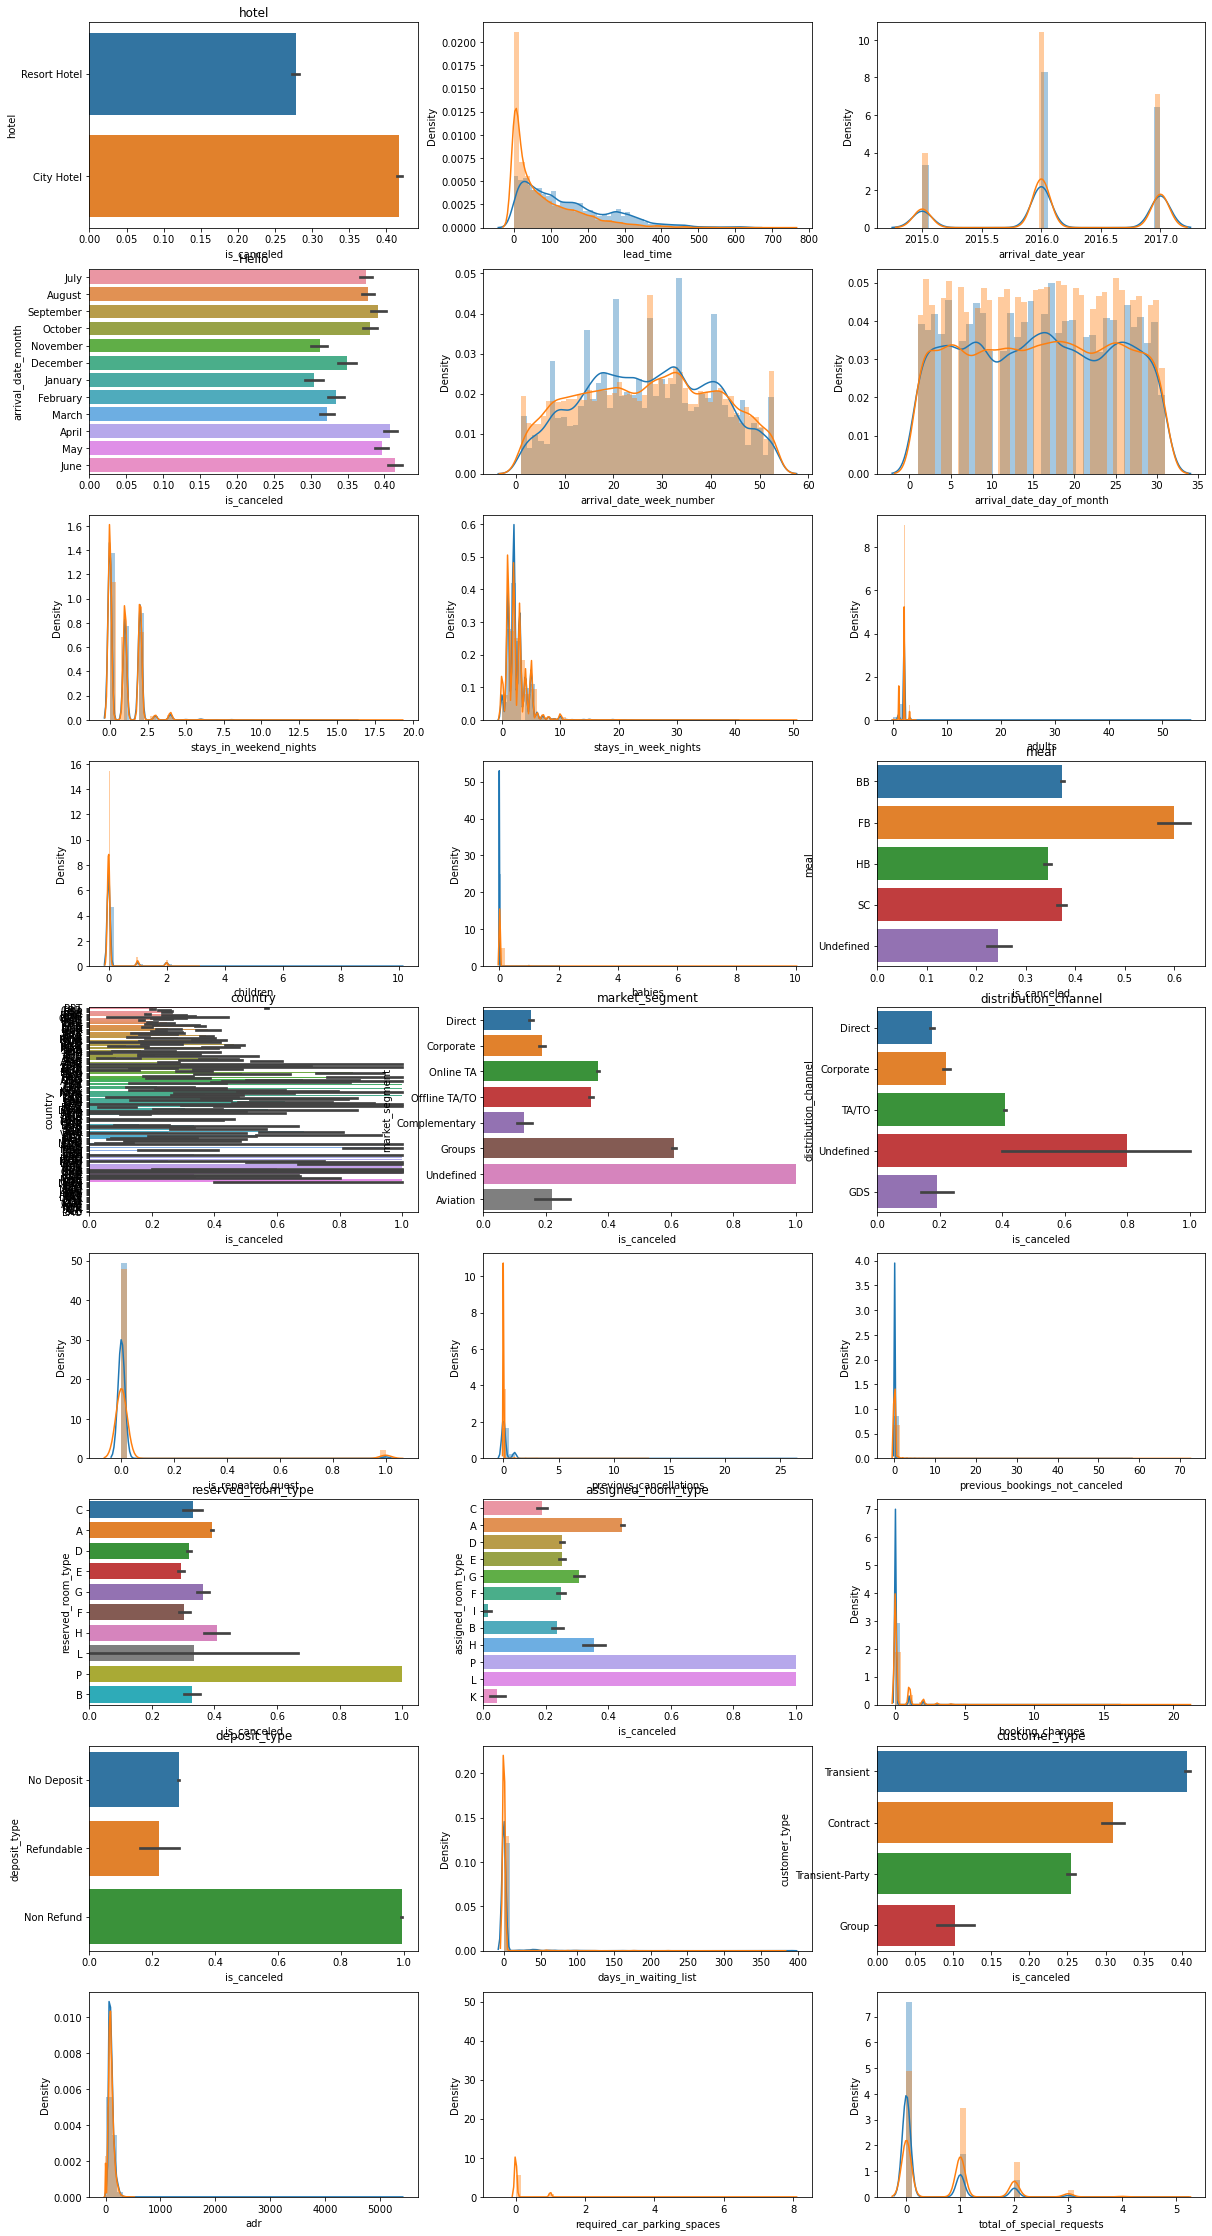

In [4]:
# compare distribution of canceled and non-canceled reservation
import warnings
warnings.filterwarnings('ignore')
idx = 0
fig, axes = plt.subplots(9, 3, figsize=(20, 40))
for col in df.columns:
    if col != target:
        if df.dtypes[col] == object:
            sns.barplot(x=target, y=col, data=df, ax=axes[idx // 3, idx % 3], );
            axes[idx // 3, idx % 3].set_title(col)
        else: 
            sns.distplot(df[df["is_canceled"] == 1][col], hist=True, label="Canceled", ax=axes[idx // 3, idx % 3]);
            sns.distplot(df[df["is_canceled"] == 0][col], hist=True, label="Not Cancel", ax=axes[idx // 3, idx % 3]);
            axes[1, 0].set_title("Hello")
        idx += 1

<AxesSubplot:xlabel='is_canceled', ylabel='index'>

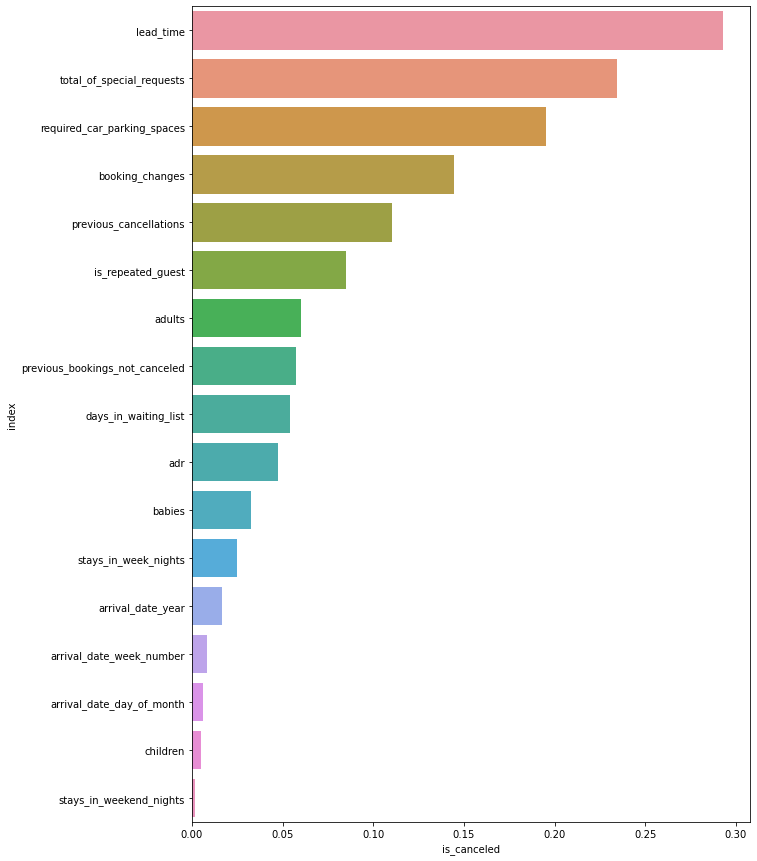

In [93]:
# correlation with Salesprice (first 20)
fig, ax = plt.subplots(figsize=(10, 15))

# computation of the correlation with target, will be used later 
correlations = df.corr()[target].reset_index()
correlations[target] = np.abs(correlations[target])
correlations = correlations.sort_values([target], ascending=False).reset_index(drop=True)
sns.barplot(ax=ax, y="index", x=target, data=correlations[1:40], orient="h")